In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv
# Import relevant libraries:
import time
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
# Import Meta-estimators
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
# Import Calibration tools
from sklearn.calibration import CalibratedClassifierCV

# Set random seed and format print output:
np.random.seed(0)
np.set_printoptions(precision=3)

In [8]:
# Data path to your local copy of Kalvin's "x_data.csv", which was produced by the negated cell above
data_path = "./data/x_data_3.csv"
df = pd.read_csv(data_path, header=0)
x_data = df.drop('category', 1)
y = df.category.as_matrix()

# Impute missing values with mean values:
#x_complete = df.fillna(df.mean())
x_complete = x_data.fillna(x_data.mean())
X_raw = x_complete.as_matrix()

# Scale the data between 0 and 1:
X = MinMaxScaler().fit_transform(X_raw)

In [9]:
yFrame = pd.DataFrame(y, columns=['category'])
yCounts = yFrame['category'].value_counts()

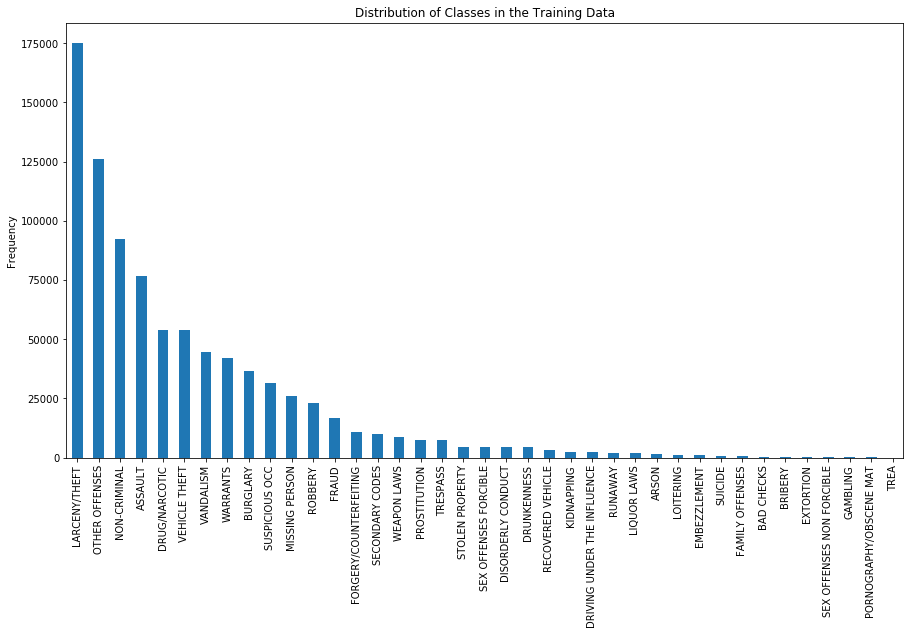

In [15]:
f = plt.figure(figsize=(15,8))
yCounts.plot(kind='bar')
plt.title('Distribution of Classes in the Training Data')
plt.ylabel('Frequency')

In [11]:
####
X = np.around(X, decimals=2)
####

# Shuffle data to remove any underlying pattern that may exist.  Must re-run random seed step each time:
np.random.seed(0)
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, y = X[shuffle], y[shuffle]

test_data, test_labels = X[800000:], y[800000:]
dev_data, dev_labels = X[700000:800000], y[700000:800000]
train_data, train_labels = X[:700000], y[:700000]

mini_train_data, mini_train_labels = X[:200000], y[:200000]
mini_dev_data, mini_dev_labels = X[430000:480000], y[430000:480000]

crime_labels = list(set(y))
crime_labels_mini_train = list(set(mini_train_labels))
crime_labels_mini_dev = list(set(mini_dev_labels))
print(len(crime_labels), len(crime_labels_mini_train), len(crime_labels_mini_dev))

print(len(train_data),len(train_labels))
print(len(dev_data),len(dev_labels))
print(len(mini_train_data),len(mini_train_labels))
print(len(mini_dev_data),len(mini_dev_labels))
print(len(test_data),len(test_labels))

39 39 39
700000 700000
100000 100000
200000 200000
50000 50000
78049 78049


In [12]:
pca1 = PCA(n_components=20)
pca1.fit(train_data)
explainedVariances = pca1.explained_variance_ratio_

totalExplained = []
for index in range(len(explainedVariances)):
    totalExplained.append(sum(explainedVariances[:index+1]))

pd.DataFrame(totalExplained)

,0
0,0.177578
1,0.294286
2,0.385809
3,0.465362
4,0.541260
5,0.611452
6,0.677962
7,0.741905
8,0.803686
9,0.858245


<function matplotlib.pyplot.show>

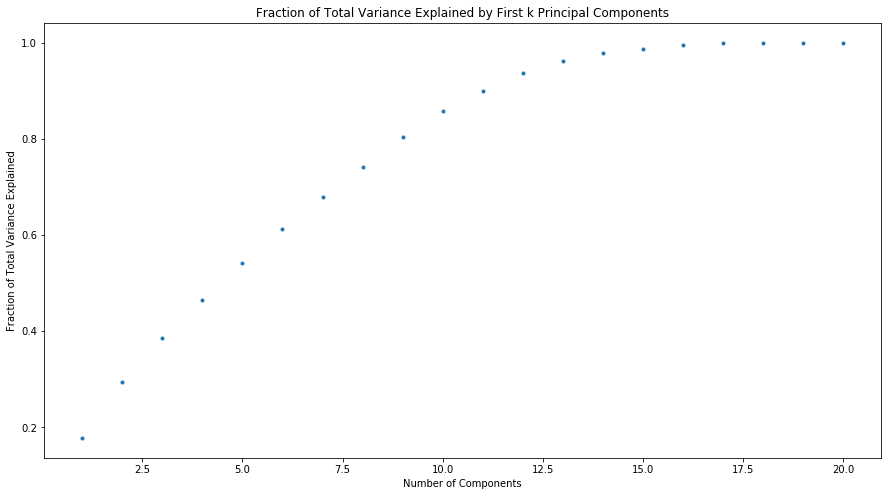

In [16]:
plt.figure(figsize=(15,8))
plt.plot(np.linspace(1,20,20),totalExplained,".")
plt.title("Fraction of Total Variance Explained by First k Principal Components")
plt.xlabel("Number of Components")
plt.ylabel("Fraction of Total Variance Explained")
plt.show